/Users/parshvisrivastava/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


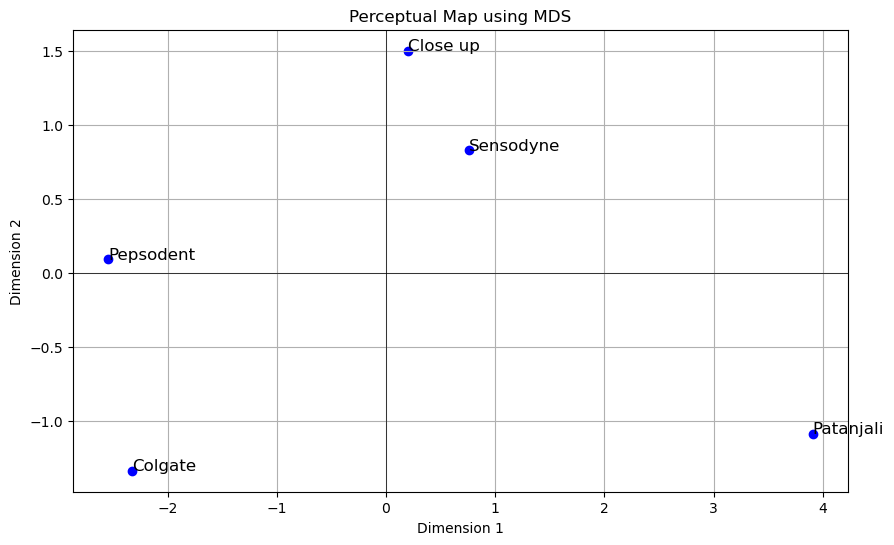

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

# Define the brands
brands = ['Colgate', 'Pepsodent', 'Close up', 'Sensodyne', 'Patanjali']

# Define the pairwise similarity ratings
similarity_ratings = {
    ('Colgate', 'Pepsodent'): 7,
    ('Colgate', 'Close up'): 3,
    ('Colgate', 'Sensodyne'): 5,
    ('Colgate', 'Patanjali'): 2,
    ('Pepsodent', 'Close up'): 6,
    ('Pepsodent', 'Sensodyne'): 4,
    ('Pepsodent', 'Patanjali'): 1,
    ('Close up', 'Sensodyne'): 8,
    ('Close up', 'Patanjali'): 3,
    ('Sensodyne', 'Patanjali'): 5,
}

# Initialize the similarity matrix with zeros
similarity_matrix = pd.DataFrame(0, index=brands, columns=brands)

# Populate the matrix
for (brand1, brand2), rating in similarity_ratings.items():
    similarity_matrix.loc[brand1, brand2] = rating
    similarity_matrix.loc[brand2, brand1] = rating

# Convert the similarity matrix to a distance matrix
# We need a distance matrix for MDS, so we convert similarity to dissimilarity
max_similarity = similarity_matrix.max().max()
distance_matrix = max_similarity - similarity_matrix

# Perform Multidimensional Scaling (MDS)
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_results = mds.fit_transform(distance_matrix)

# Create a DataFrame for the MDS results
mds_df = pd.DataFrame(mds_results, columns=['Dimension 1', 'Dimension 2'], index=brands)

# Plot the perceptual map
plt.figure(figsize=(10, 6))
plt.scatter(mds_df['Dimension 1'], mds_df['Dimension 2'], color='blue')

# Annotate the points with brand labels
for brand in mds_df.index:
    plt.text(mds_df.loc[brand, 'Dimension 1'], mds_df.loc[brand, 'Dimension 2'], brand, fontsize=12)

plt.title('Perceptual Map using MDS')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.show()


In [ ]:
similarity_matrix

,Colgate,Pepsodent,Close up,Sensodyne,Patanjali
Colgate,0,7,3,5,2
Pepsodent,7,0,6,4,1
Close up,3,6,0,8,3
Sensodyne,5,4,8,0,5
Patanjali,2,1,3,5,0


In [ ]:
max_similarity

8

In [ ]:
distance_matrix

,Colgate,Pepsodent,Close up,Sensodyne,Patanjali
Colgate,8,1,5,3,6
Pepsodent,1,8,2,4,7
Close up,5,2,8,0,5
Sensodyne,3,4,0,8,3
Patanjali,6,7,5,3,8


In [ ]:
mds_df

,Dimension 1,Dimension 2
Colgate,-2.324164,-1.338050
Pepsodent,-2.544215,0.093042
Close up,0.200599,1.502141
Sensodyne,0.759184,0.831230
Patanjali,3.908596,-1.088362


Correspondence Analysis

In [ ]:
%pip install prince

  Obtaining dependency information for prince from https://files.pythonhosted.org/packages/ea/47/05a78e27a6c7f85b5e006169e4ddf27637867124ef841176f5e4f5ce7f88/prince-0.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for altair<6.0.0,>=4.2.2 from https://files.pythonhosted.org/packages/46/30/2118537233fa72c1d91a81f5908a7e843a6601ccc68b76838ebc4951505f/altair-5.3.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.6/415.6 kB 4.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 857.8/857.8 kB 8.2 MB/s eta 0:00:00a 0:00:01m
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import prince

data = {
    'Flavor (Mint)': [20, 25, 30, 10, 15],
    'Flavor (Fruit)': [5, 10, 5, 15, 10],
    'Price (Low)': [15, 10, 20, 30, 25],
    'Price (High)': [10, 25, 15, 20, 15],
    'Whitening (Yes)': [18, 20, 25, 15, 10],
    'Whitening (No)': [7, 15, 10, 20, 15]
}

df = pd.DataFrame(data, index=['Colgate', 'Close up', 'Pepsodent', 'Sensodyne', 'Patanjali'])


In [ ]:
df

,Flavor (Mint),Flavor (Fruit),Price (Low),Price (High),Whitening (Yes),Whitening (No)
Colgate,20,5,15,10,18,7
Close up,25,10,10,25,20,15
Pepsodent,30,5,20,15,25,10
Sensodyne,10,15,30,20,15,20
Patanjali,15,10,25,15,10,15


In [ ]:

ca = prince.CA(n_components=2)
ca = ca.fit(df)

In [ ]:
row_coords = ca.row_coordinates(df)
col_coords = ca.column_coordinates(df)

In [ ]:
print("Row Principal Coordinates:")
print(row_coords)
print("\nColumn Principal Coordinates:")
print(col_coords)

Row Principal Coordinates:
                  0         1
Colgate   -0.226213 -0.124559
Close up  -0.138143  0.262096
Pepsodent -0.279298 -0.111682
Sensodyne  0.357742 -0.003765
Patanjali  0.238284 -0.067082

Column Principal Coordinates:
                        0         1
Flavor (Mint)   -0.351719 -0.023092
Flavor (Fruit)   0.326052  0.109752
Price (Low)      0.241819 -0.226755
Price (High)     0.037038  0.207968
Whitening (Yes) -0.263477 -0.040922
Whitening (No)   0.244112  0.089101


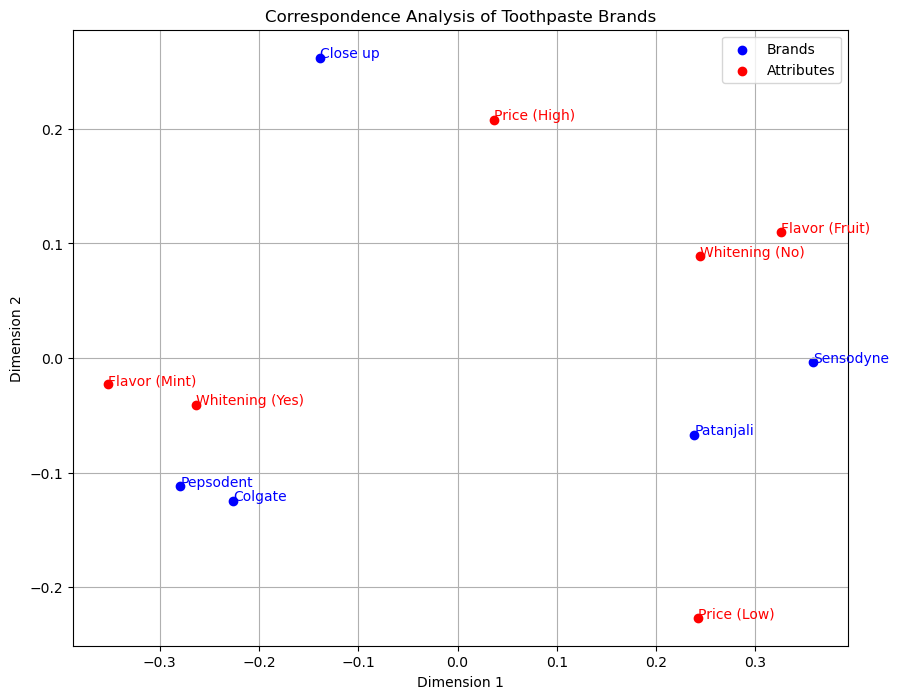

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

# Plot row points (brands)
ax.scatter(row_coords[0], row_coords[1], color='blue', label='Brands')
for i, txt in enumerate(row_coords.index):
    ax.annotate(txt, (row_coords[0][i], row_coords[1][i]), color='blue')

# Plot column points (attributes)
ax.scatter(col_coords[0], col_coords[1], color='red', label='Attributes')
for i, txt in enumerate(col_coords.index):
    ax.annotate(txt, (col_coords[0][i], col_coords[1][i]), color='red')

ax.set_title('Correspondence Analysis of Toothpaste Brands')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.legend()

plt.grid()
plt.show()